# Data Importing & Exploring

In [1]:
import pandas as pd 

df = pd.read_csv("data/heart.csv")


df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [2]:
df.shape

(1319, 9)

In [3]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [4]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


## visualization

### Hist

<Axes: >

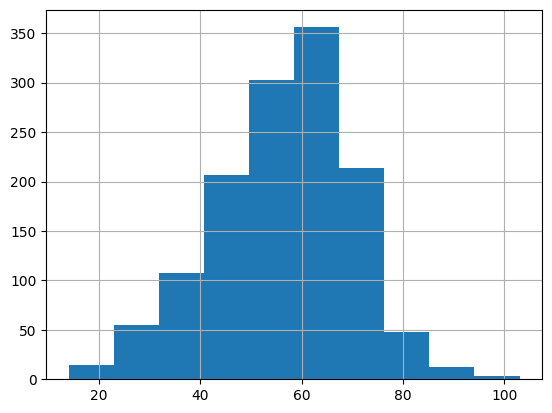

In [7]:
df["age"].hist()

<Axes: >

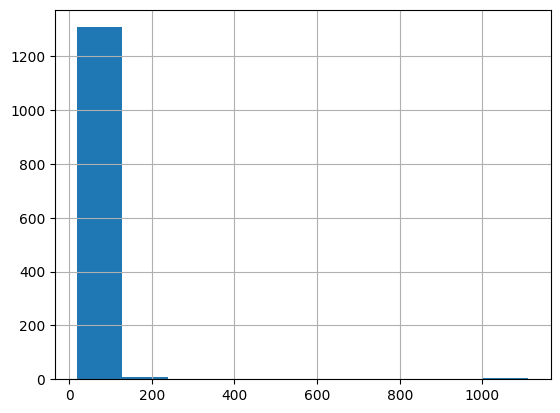

In [8]:
df["impluse"].hist()

<Axes: >

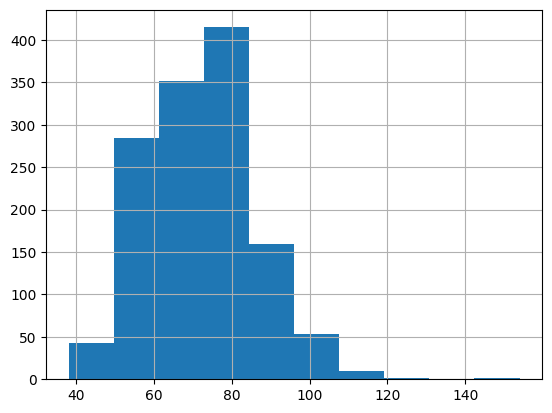

In [9]:
df["pressurelow"].hist()

<Axes: >

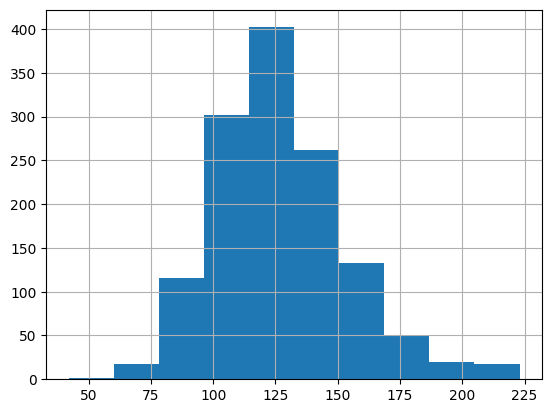

In [10]:
df["pressurehight"].hist()


<Axes: >

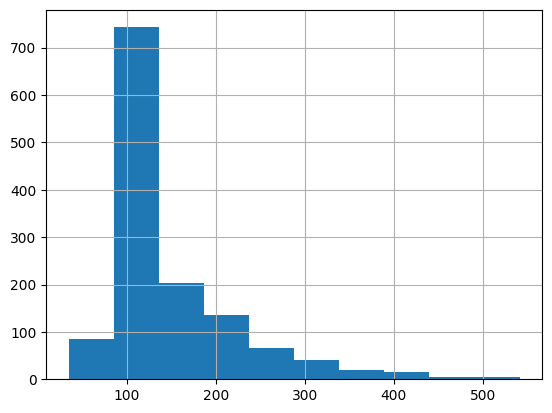

In [11]:
df["glucose"].hist()


<Axes: >

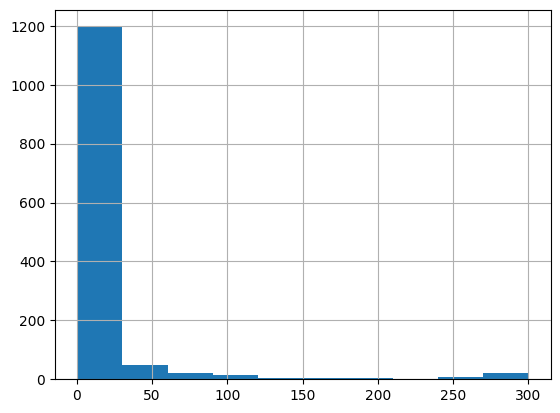

In [12]:
df["kcm"].hist()


<Axes: >

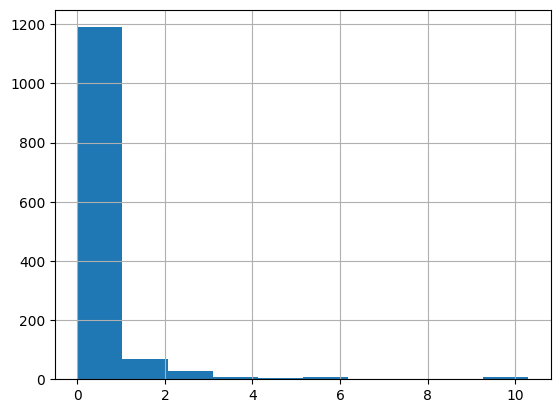

In [13]:
df["troponin"].hist()


### Bar Plot

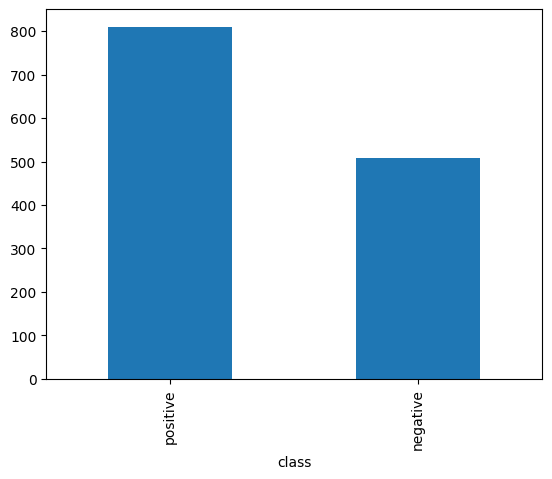

In [14]:
import matplotlib.pyplot as plt

df['class'].value_counts().plot(kind='bar')
plt.show()


# PreProessing

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

features = ["age", "pressurelow", "pressurehight", "glucose", "kcm", "troponin"]

scaler = MinMaxScaler()



df[features] = scaler.fit_transform(df[features])

# Data preperation

In [5]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['class']= label_encoder.fit_transform(df['class']) 

df['class'].unique()


array([0, 1])

In [6]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["class"])
y = df["class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Modeling

In [11]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from modules.models import Models
from sklearn.metrics import accuracy_score

all_results = []
for model_name in ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]:
    model = Models(model_name)
    results = model.train_and_evaluate(X_train, y_train, X_val, y_val)
    all_results.extend(results)

all_results_df = pd.DataFrame(all_results)

# Results DataFrames
print("All Results:")
all_results_df


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\moham\AppData\Local\Programs\Py

All Results:


,Algorithm,Hyperparameters,Training Performance,Validation Performance,Training Time (s),Validation Prediction Time (s)
0,Logistic Regression,"{'C': 0.01, 'solver': 'liblinear'}",0.757313,0.727273,0.010956,0.002378
1,Logistic Regression,"{'C': 0.01, 'solver': 'sag'}",0.707476,0.681818,0.014747,0.000000
2,Logistic Regression,"{'C': 0.01, 'solver': 'lbfgs'}",0.748646,0.742424,0.013227,0.000000
3,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.828819,0.792929,0.014778,0.001050
4,Logistic Regression,"{'C': 1, 'solver': 'sag'}",0.706392,0.681818,0.013561,0.001995
5,Logistic Regression,"{'C': 1, 'solver': 'lbfgs'}",0.825569,0.772727,0.011092,0.000000
6,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.867822,0.843434,0.019101,0.000997
7,Logistic Regression,"{'C': 10, 'solver': 'sag'}",0.706392,0.681818,0.014264,0.000000
8,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.875406,0.853535,0.015363,0.000000
9,Random Forest,"{'n_estimators': 50, 'max_depth': 5}",0.992416,0.964646,0.102317,0.002002


In [12]:
# Select best model for each algorithm
best_models_df = all_results_df.loc[all_results_df.groupby('Algorithm')['Validation Performance'].idxmax()].reset_index(drop=True)


print("\nBest Models:")
best_models_df



Best Models:


,Algorithm,Hyperparameters,Training Performance,Validation Performance,Training Time (s),Validation Prediction Time (s)
0,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.875406,0.853535,0.015363,0.000000
1,Random Forest,"{'n_estimators': 200, 'max_depth': 5}",0.992416,0.969697,0.433537,0.000000
2,SVM,"{'C': 10, 'kernel': 'linear'}",0.887324,0.878788,19.380716,0.000000
3,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 300}",0.997833,0.974747,0.224871,0.005986


In [13]:
# Evaluate best models on test set
test_results = []
for index, row in best_models_df.iterrows():
    model_name = row['Algorithm']
    params = row['Hyperparameters']
    
    # Re-initialize model with best parameters
    if model_name == "Logistic Regression":
        model = LogisticRegression(**params)
    elif model_name == "Random Forest":
        model = RandomForestClassifier(**params, random_state=42)
    elif model_name == "SVM":
        model = SVC(**params)
    elif model_name == "XGBoost":
        model = XGBClassifier(**params, eval_metric="mlogloss")
    
    # Train and time
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    # Test evaluation
    start_test = time.time()
    test_score = accuracy_score(y_test, model.predict(X_test))
    test_time = time.time() - start_test
    
    test_results.append({
        "Algorithm": model_name,
        "Hyperparameters": str(params),
        "Training Performance": row['Training Performance'],
        "Validation Performance": row['Validation Performance'],
        "Test Performance": test_score,
        "Training Time (s)": train_time,
        "Test Prediction Time (s)": test_time
    })

test_results_df = pd.DataFrame(test_results)


print("\nTest Performance:")
test_results_df

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Test Performance:


,Algorithm,Hyperparameters,Training Performance,Validation Performance,Test Performance,Training Time (s),Test Prediction Time (s)
0,Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.875406,0.853535,0.823232,0.044903,0.004381
1,Random Forest,"{'n_estimators': 200, 'max_depth': 5}",0.992416,0.969697,0.989899,0.318588,0.007687
2,SVM,"{'C': 10, 'kernel': 'linear'}",0.887324,0.878788,0.883838,19.097858,0.005763
3,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 300}",0.997833,0.974747,0.994949,0.389649,0.007288


In [23]:
results.to_excel("data/results_df_test.xlsx", index=False)

In [12]:
best_models_df.to_excel("data/best_models_df.xlsx", index=False)

# Overfitting Check

## LogisticRegression

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

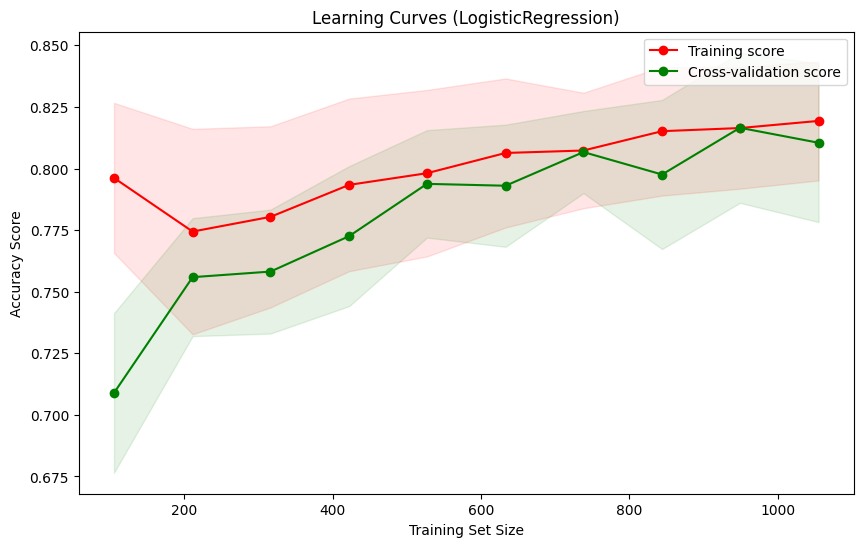

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LogisticRegression(C=10, solver= "lbfgs"),
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Using 5-fold cross-validation
    scoring='accuracy'  # Using accuracy as the metric
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (LogisticRegression)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


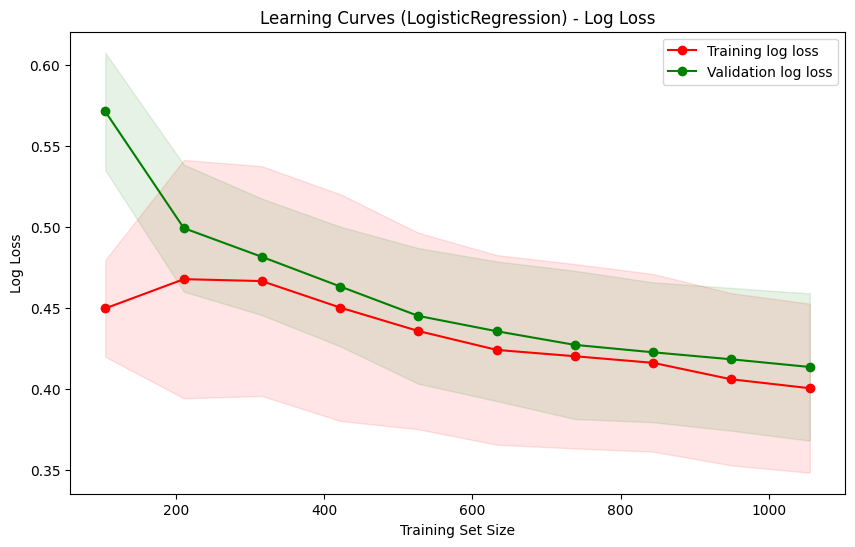

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LogisticRegression(C=10, solver="lbfgs", max_iter=10000),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                   # 5-fold cross-validation
    scoring='neg_log_loss'  # use negative log loss as metric
)

# Convert negative log loss to positive for plotting
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(-validation_scores, axis=1)

plt.figure(figsize=(10, 6))

# Fill between for training
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")

# Fill between for validation
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")

# Plot lines
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation log loss")

plt.title("Learning Curves (LogisticRegression) - Log Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")  
plt.legend(loc="best")
plt.show()


## RandomForestClassifier

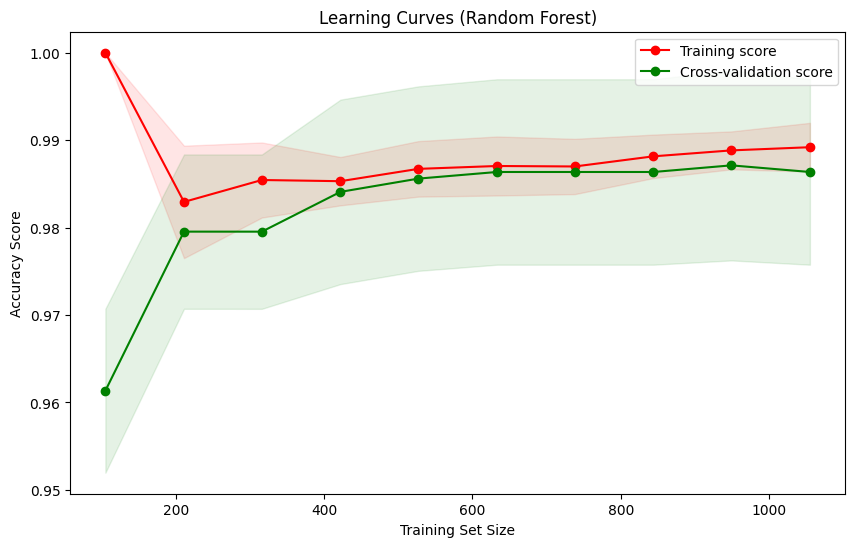

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=RandomForestClassifier(n_estimators= 200, max_depth= 5),
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Using 5-fold cross-validation
    scoring='accuracy'  # Using accuracy as the metric
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


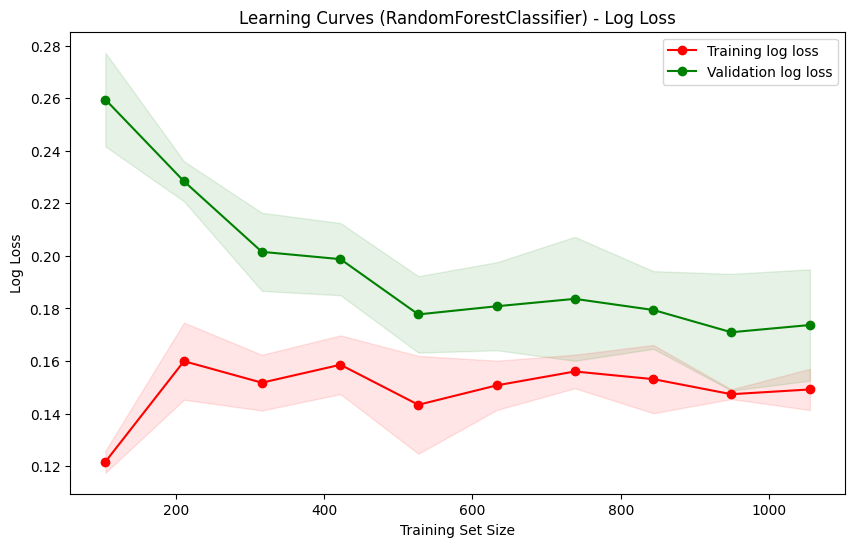

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=RandomForestClassifier(n_estimators= 200, max_depth= 5),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                   # 5-fold cross-validation
    scoring='neg_log_loss'  # use negative log loss as metric
)

# Convert negative log loss to positive for plotting
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(-validation_scores, axis=1)

plt.figure(figsize=(10, 6))

# Fill between for training
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")

# Fill between for validation
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")

# Plot lines
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation log loss")

plt.title("Learning Curves (RandomForestClassifier) - Log Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")  
plt.legend(loc="best")
plt.show()


## SVC

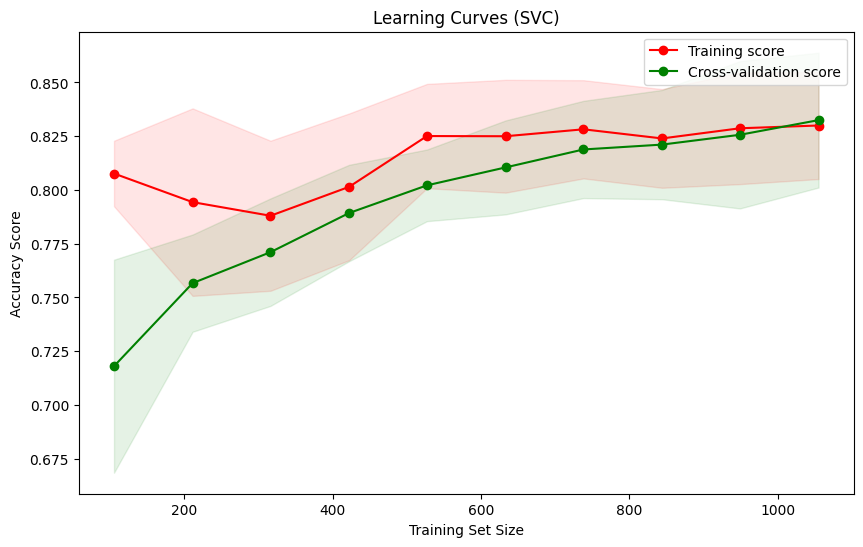

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=SVC(C= 10, kernel= 'linear'),
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Using 5-fold cross-validation
    scoring='accuracy'  # Using accuracy as the metric
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (SVC)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=SVC(C= 10, kernel= 'linear'),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                   # 5-fold cross-validation
    scoring='neg_log_loss'  # use negative log loss as metric
)

# Convert negative log loss to positive for plotting
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(-validation_scores, axis=1)

plt.figure(figsize=(10, 6))

# Fill between for training
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")

# Fill between for validation
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")

# Plot lines
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation log loss")

plt.title("Learning Curves (SVC) - Log Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")  
plt.legend(loc="best")
plt.show()


## XGBClassifier

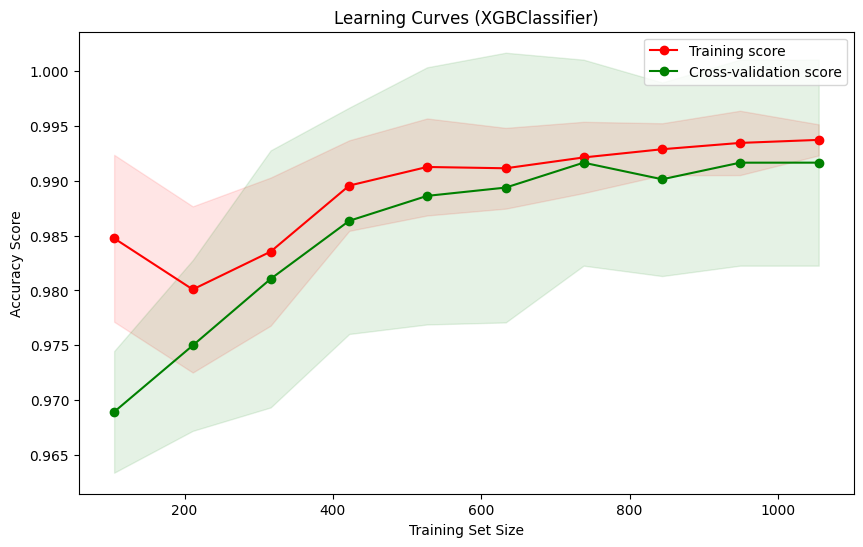

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=XGBClassifier(learning_rate= 0.01, n_estimators= 300),
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # Using 5-fold cross-validation
    scoring='accuracy'  # Using accuracy as the metric
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10,6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (XGBClassifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()


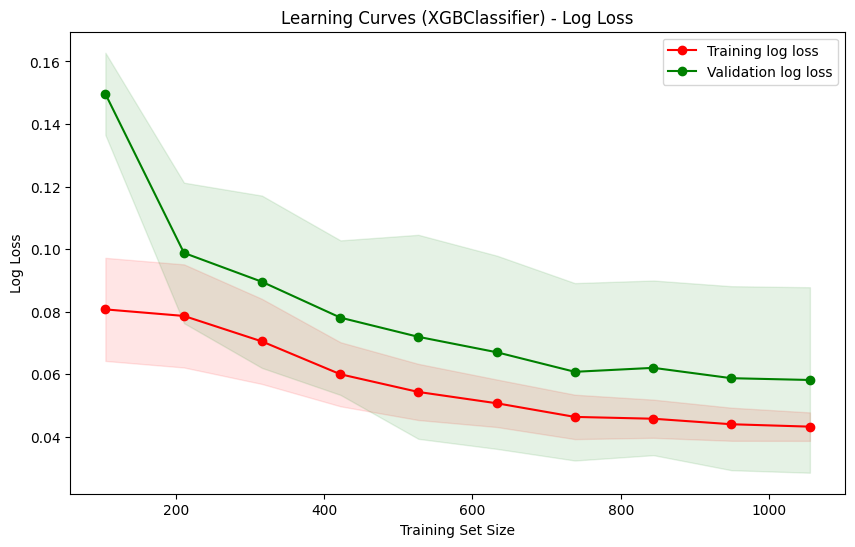

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=XGBClassifier(learning_rate= 0.01, n_estimators= 300),
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                   # 5-fold cross-validation
    scoring='neg_log_loss'  # use negative log loss as metric
)

# Convert negative log loss to positive for plotting
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(-validation_scores, axis=1)

plt.figure(figsize=(10, 6))

# Fill between for training
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")

# Fill between for validation
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color="g")

# Plot lines
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training log loss")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation log loss")

plt.title("Learning Curves (XGBClassifier) - Log Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")  
plt.legend(loc="best")
plt.show()
